# Machine Learning
# Assignment 2: Logistic Regression

Please write your full name here
- **Name** : "Somaia Ahmed"

## Instructions
- Please place your code where you're asked to. Do not change any other code.
- Place your markdown answers inside the cells labelled "Answer".
- Submit the notebook with your solutions and keep the cell outputs.
- Please name your notebook in the following format "assignment2_FirstnameLastname.ipynb"
- Late submissions will be penalized.

In [ ]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)

### Part 1
Run the following cells to download fmnist dataset which will be used for the rest of the assignment.

In [ ]:
!pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.5 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=1a7662f82479905ced0806d9312568fdaaf883747559f00ccff3c20dedbc4ef0
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [ ]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute);
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal",
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

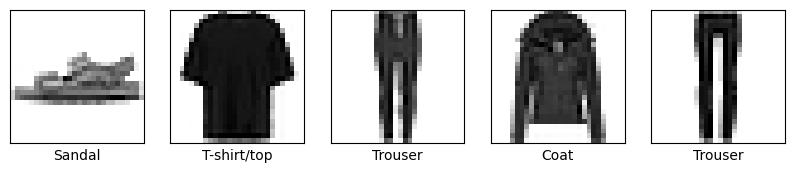

In [ ]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

### Question 1
First, we'll try the default Logistic Regression and Decision tree as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using cross_validation.

Implement the following `evaluate_learners` function which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You must use `cross_validate` function.

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1, random_state =0)

In [ ]:
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data.

    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    ########## write your code here ##############
    train_scores = []
    test_scores = []

    for c in classifiers:
      scores = cross_validate(c, X, y, cv = 5, return_train_score = True)
      train_scores.append(scores['train_score'])
      test_scores.append(scores['test_score'])

    return train_scores, test_scores

# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.

With this small sample of our data we can now train and evaluate the two classifiers.

In [ ]:
classifiers = [LogisticRegression(), DecisionTreeClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Print train scores and test scores.

In [ ]:
# print scores
print("Train Scores: ", train_scores)
print("Test Scores: ", test_scores)

Train Scores:  [array([0.9125    , 0.92053571, 0.92107143, 0.92089286, 0.91767857]), array([1., 1., 1., 1., 1.])]
Test Scores:  [array([0.835     , 0.80071429, 0.82      , 0.81428571, 0.81214286]), array([0.74214286, 0.73214286, 0.73285714, 0.74785714, 0.74214286])]


### Regularization
We will now tune these algorithm's regularization hyperparameters: C (Inverse of regularization strength) in logistic regression (smaller values specify stronger regularization), and the maximum depth (max_depth) in decision tree. C should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and max_depth should be varied uniformly (i.e. [1,2,3,4]).

### Question 2
In the following cells we vary the regularization parameters in the range given above and, for each classifier, we create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, 2 plots are produced, one for each classifier. We use 5-fold cross validation for all scores, but only plot the means.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_c = {'C': np.logspace(-12, 12, num=22)}
param_d = {'max_depth': np.arange(1, 11, 1)}
grids = [param_c, param_d]
grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=3, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grids)]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax, log):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    if log:
        ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

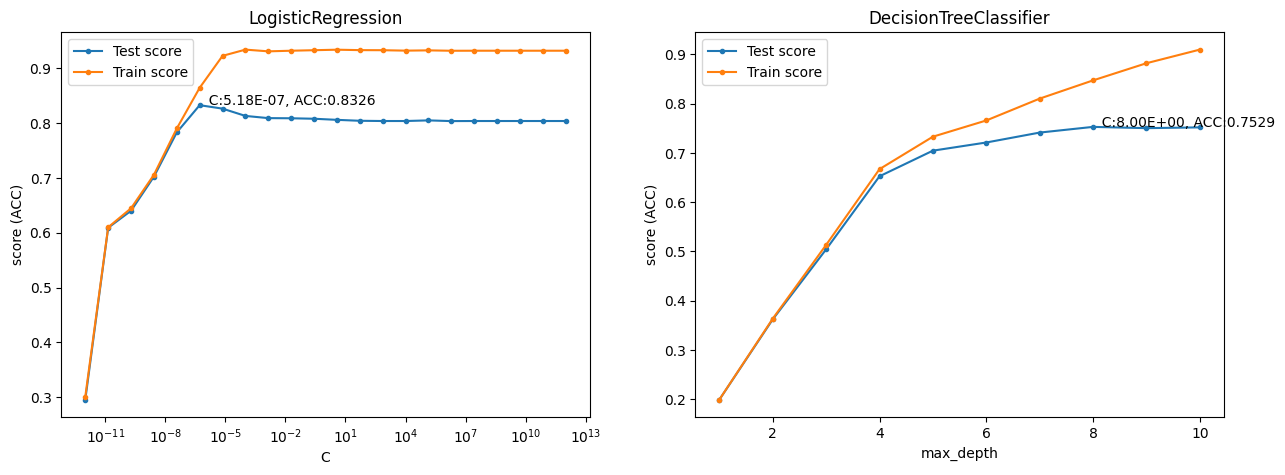

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['C','max_depth'],axes):
    if param == 'C':
        log = True
    else:
        log = False
    plot_tuning(grid_search, param, ax, log=log)

Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

**Answer**

### Logistic Regression :

* Underfitting => when c very small
* Best Performance => when c = 5.18*10e-7
* Overfitting => when c is large



### Desicion Tree

* Underfittnig => when max_depth is small(1-3)
* Best Performance => when max_depth = 8
* Overfitting => when max_depth increases beyond 8



### Sensitivity
* Too much regularization leads to underfitting.

* Too little regularization leads to overfitting.


## Interpreting misclassifications
We train a logistic regression model on the data to look at the confusion matrix

In [ ]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

In [ ]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Question 3
A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. Draw the complete confusion matrix for the true and predicted test data.

In [ ]:
#### Code for calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

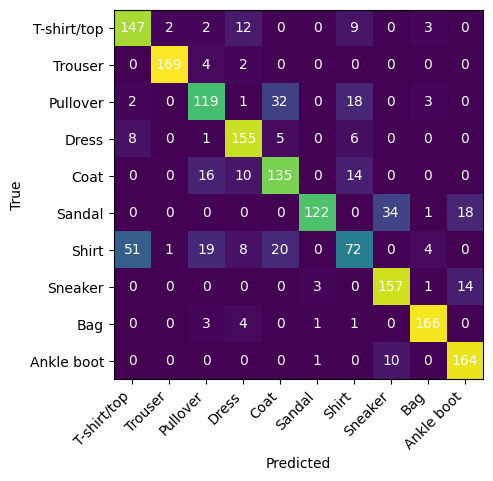

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Question 4
Train a Logistic Regression model using its tuned hyperparameter from gridsearch used above.
When in doubt, use `C=1e-7` for LogReg.
Pass the trained model to the provided plotting function. Interpret the results in detail.
Why do you get multiple plots per model? What do the features represent in your data.
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes?

In [ ]:
# Plots the coefficients of the given model as 28x28 heatmaps.
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

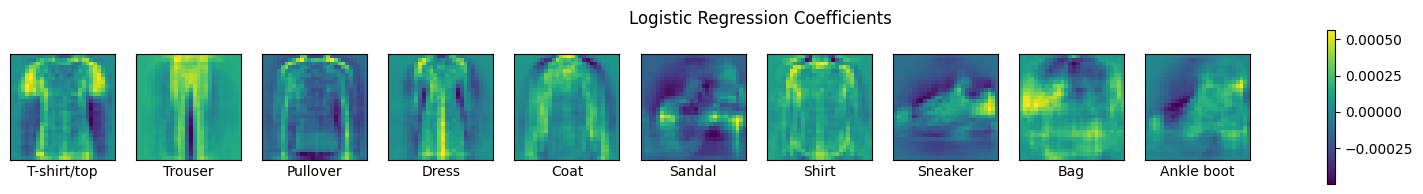

In [ ]:
##### Call on the function plot_coefficients using your trained model
plot_coefficients(model, "Logistic Regression Coefficients")


**Hint** that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

**Answer:**

### Question 5
Finally, out of curiosity, let's see the result of underfitting and overfitting on the learned coefficients:
Repeat the previous exercise, only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot.

In the cell below replace the ####### with your trained models with different alphas.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


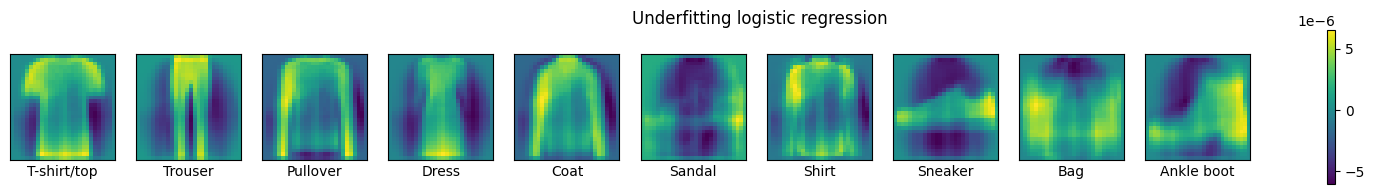

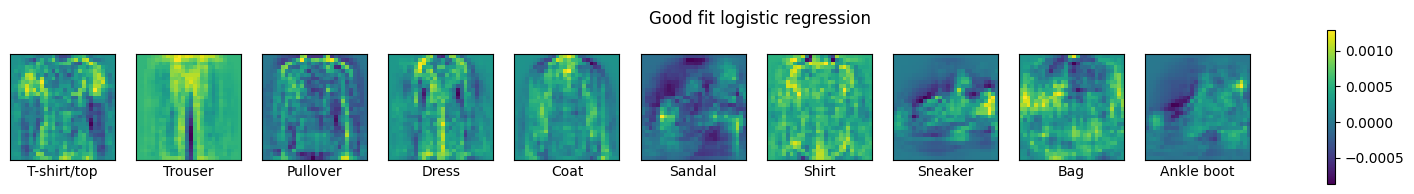

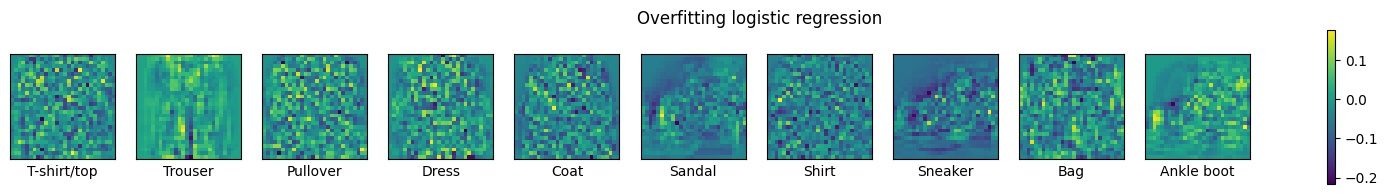

In [ ]:
under_lr = LogisticRegression(C=1e-10, max_iter=1000)
under_lr.fit(X_train, y_train)

over_lr = LogisticRegression(C=1e5, max_iter=1000)
over_lr.fit(X_train, y_train)

good_lr = LogisticRegression(C=5.18e-7, max_iter=1000)
good_lr.fit(X_train, y_train)

plot_coefficients(under_lr,"Underfitting logistic regression")
plot_coefficients(good_lr,"Good fit logistic regression")
plot_coefficients(over_lr,"Overfitting logistic regression")

Interpret and explain the results.
* **Answer:**

As qs 2

* Overfitting occurs when c is too large, leading to a very complex decision boundary that captures noise reather than patterns

* The model needs stronger regularization "smaller C" to smooth out the coefficient distribution and focus on generalizable features

# Part 2

In this part, you will use a bank dataset that predicts customer response to telemarketing campaigns for term deposit.

You should follow the workflow we described in class to use logistic regression to train on the data

1. Train - Test split (80-20%)
    - Study and handle any imbalance in the data's target
2. Data Exploration and cleaning
    - Remove duplicates
    - Handle outliers
    - Handle missing values
    - Handle categorical data
    
    (dont forget to apply the same preprocessing to the test set!)
3. Model selection --> Select the best model:
    - Train an l2 regularized logistic regression model
        - Use crossvalidation with grid search to set the learning rate and the regularization hyperparameters
    - Train a logistic regression model without regullarization
        - Use crossvalidation with grid search to set the learning rate  hyperparameter
    - Don't forget normalization of features!
4. Test the chosen model on the test data
5. Interpret the results using confusion matrix --> how does it do on each class?

### Attribute information For bank dataset

### Input variables:
**Bank client data:**
*   1 - age : (numeric)
*   2 - job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
*   3 - marital : marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)
*   4 - education (categorical: "unknown", "secondary","primary", "tertiary")
*   5 - default: has credit in default? (binary: "yes", "no")
*   6 - balance: average yearly balance, in euros (numeric)
*   7 - housing: has housing loan? (binary: "yes", "no")
*   8 - loan: has personal loan? (binary: "yes", "no")
  
**Related with the last contact of the current campaign:**
*   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
*  10 - day: last contact day of the month (numeric)
*  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
*  12 - duration: last contact duration, in seconds (numeric)
   
**Other attributes:**
*  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
*  15 - previous: number of contacts performed before this campaign and for this client (numeric)
*  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")

- The Output variable - y - describes whether the client has subscribed to a term deposit or not, ("yes" or "no")

In [ ]:
import pandas as pd

df = pd.read_csv("/content/bank-full.csv", delimiter = ";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df['y'].value_counts()


,count
y,
no,39922
yes,5289


<Axes: xlabel='y'>

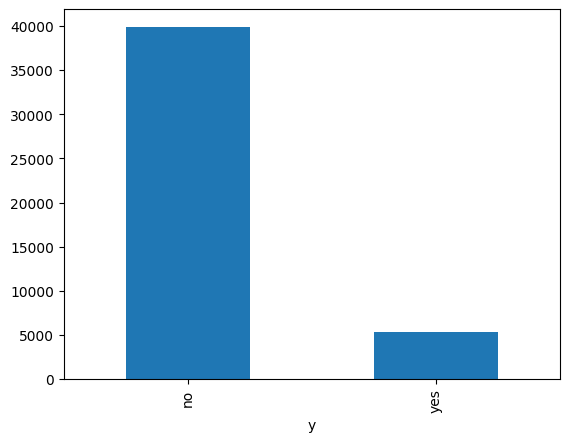

In [ ]:
df['y'].value_counts().plot(kind='bar')

In [ ]:

X = df.drop('y', axis=1)
y = df['y']

In [ ]:
print(X.shape)
print(y.shape)

(45211, 16)
(45211,)


In [ ]:
X = X.drop_duplicates()


In [ ]:
from sklearn.preprocessing import OneHotEncoder


X_encoded = pd.get_dummies(X, drop_first=True)

# X_encoded = X_encoded.astype(int)
X_encoded.shape


(45211, 42)

In [ ]:
y_encoded = pd.get_dummies(y, drop_first=True)
# y_encoded = y_encoded.astype(int)
y_encoded.shape

(45211, 1)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto",random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_encoded, y_encoded)

In [ ]:
print(X_balanced.shape)
print(y_balanced.shape)

(79844, 42)
(79844, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify = y_balanced)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

sgd = SGDClassifier(loss = "log_loss", penalty = "l2", max_iter = 1000, random_state=42)

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
              "learning_rate":["constant", "optimal", "invscaling", "adaptive"],
              "eta0": [0.01, 0.1, 1]  }

grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy', n_jobs = -1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Best Parameters:" , best_model)
print("Best Score:", best_score)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: SGDClassifier(eta0=0.1, learning_rate='invscaling', loss='log_loss',
              random_state=42)
Best Score: 0.9284227005870843


In [ ]:
sgd_no_reg = SGDClassifier(loss = "log_loss", penalty = None, max_iter = 1000, random_state=42)

param_grid_no_reg = {
              "learning_rate":["constant", "optimal", "invscaling", "adaptive"],
                  "eta0": [0.01, 0.1, 1]  }

grid_search_no_reg = GridSearchCV(sgd_no_reg, param_grid_no_reg, cv=5, scoring='accuracy', n_jobs = -1)
grid_search_no_reg.fit(X_train_scaled, y_train)

best_model_no_reg = grid_search_no_reg.best_estimator_
best_score_no_reg = grid_search_no_reg.best_score_
print("Best Parameters:" , best_model_no_reg)
print("Best Score:", best_score_no_reg)

Best Parameters: SGDClassifier(eta0=0.1, learning_rate='invscaling', loss='log_loss',
              penalty=None, random_state=42)
Best Score: 0.9284383561643835


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = best_model.predict(X_test_scaled)
y_pred_no_reg = best_model_no_reg.predict(X_test_scaled)

# Evaluate accuracy
print("L2 Regularized Model Accuracy:", accuracy_score(y_test, y_pred))
print("No Regularization Model Accuracy:", accuracy_score(y_test, y_pred_no_reg))

# Classification report
print("L2 Regularized Model Report:\n", classification_report(y_test, y_pred))
print("No Regularization Model Report:\n", classification_report(y_test, y_pred_no_reg))




L2 Regularized Model Accuracy: 0.929801490387626
No Regularization Model Accuracy: 0.9297388690588014
L2 Regularized Model Report:
               precision    recall  f1-score   support

       False       0.92      0.94      0.93      7985
        True       0.94      0.92      0.93      7984

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969

No Regularization Model Report:
               precision    recall  f1-score   support

       False       0.92      0.94      0.93      7985
        True       0.94      0.92      0.93      7984

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969



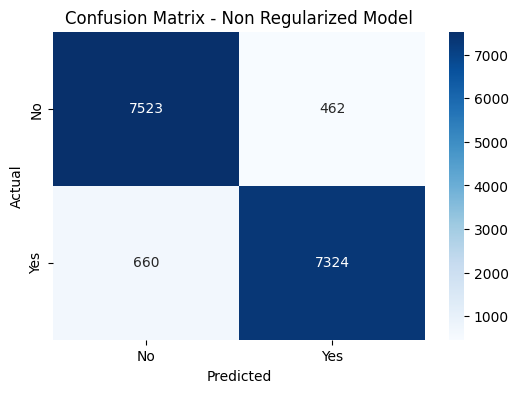

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_no_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Non Regularized Model")
plt.show()

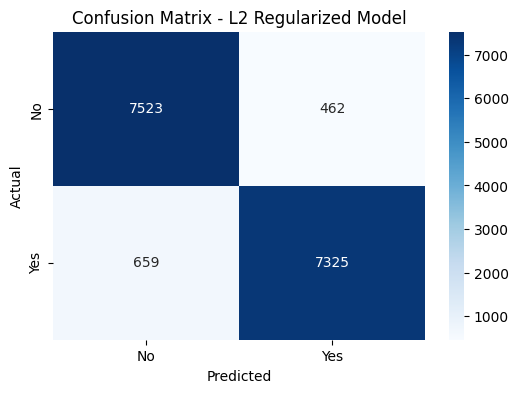

In [ ]:

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - L2 Regularized Model")
plt.show()

* True Positives (7325):

The model correctly classified 7325 "Yes" instances (actual "Yes" and predicted "Yes").

This indicates strong performance in identifying positive cases.

* True Negatives (7523):

The model correctly classified 7523 "No" instances (actual "No" and predicted "No").

It is also performing well in detecting negative cases.

* False Positives (462):

462 instances were misclassified as "Yes" when they were actually "No".

This means the model makes some incorrect positive predictions (false alarms).

* False Negatives (659):

659 instances were misclassified as "No" when they were actually "Yes".

This suggests that some positive cases are being missed.